In [1]:
import os
import sys
import subprocess
import numpy as np
import seaborn as sns
import json
import pandas as pd
import shutil
import librosa.display
import matplotlib
import matplotlib.pyplot as plt 

Matplotlib is building the font cache; this may take a moment.


In [14]:
# df = pd.read_csv("/home/abhijeet/Desktop/extracted/train2.csv")
df = pd.read_csv("/home/abhijeet/Desktop/train2_exp.csv")

df.head()

,id,path,date,status,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,...,delta2_mfcc43,delta2_mfcc44,delta2_mfcc45,delta2_mfcc46,delta2_mfcc47,delta2_mfcc48,delta2_mfcc49,delta2_mfcc50,delta2_mfcc51,delta2_mfcc52
0,iOx0zPyPiMZjCWXuf3RGu8HKq8k1,/home/abhijeet/Desktop/extracted/20210630/iOx0...,20210630,positive,0.571208,0.017260,1816.135002,1825.064974,3654.356836,0.329156,...,0.004345,-0.004861,0.000890,0.010749,-0.003898,-0.008286,-0.000035,0.005898,-0.020526,-0.017116
1,gFmySpqfQ7YrYqMrmrMPO7AzmBm1,/home/abhijeet/Desktop/extracted/20210630/gFmy...,20210628,positive,0.485491,0.055333,1803.227275,1514.007823,3375.087099,0.179753,...,0.037521,0.029859,-0.010931,-0.035267,-0.015948,-0.023493,-0.030032,-0.032335,-0.052866,-0.048199
2,padXEGczMRRKmLRVc68rEKI142B3,/home/abhijeet/Desktop/extracted/20210630/padX...,20210628,positive,0.575894,0.031052,2309.826271,1891.974883,4314.941977,0.260138,...,-0.003277,-0.015553,-0.021170,-0.024662,0.013740,0.014496,-0.011968,-0.038552,-0.050468,-0.041814
3,ymX9t6DWDHZTs28MODDSxDaOj4n2,/home/abhijeet/Desktop/extracted/20210630/ymX9...,20210628,positive,0.525386,0.044825,2033.952673,1637.164773,3715.567276,0.289644,...,0.003627,-0.000107,-0.019847,-0.022493,-0.009439,0.000225,-0.015788,-0.027721,-0.026349,-0.003966
4,loK2K444HrZUD8Plzr6q3i8y4Xg1,/home/abhijeet/Desktop/extracted/20210630/loK2...,20210628,positive,0.571209,0.041385,2294.375713,1698.955349,4093.764134,0.247430,...,-0.048322,-0.057545,-0.085102,-0.015867,-0.069085,-0.061387,-0.050960,-0.040289,-0.030106,-0.036003


In [15]:
# sns.pairplot(df,hue = 'status')

<AxesSubplot:xlabel='rmse', ylabel='zero_crossing_rate'>

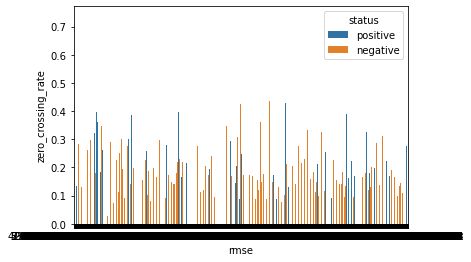

In [5]:
sns.barplot(data =df , x= 'rmse',y='zero_crossing_rate',hue='status')

In [16]:
def feature_count(data):
    # missing values
    total_missing = data.isnull().sum().sort_values(ascending = False)
    percent_missing = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    missing = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
    
    #unique values 
    total_data = data.count()
    tt = pd.DataFrame(total_data)
    tt.columns = ['Total']
    uniques = []
    for col in data.columns:
        unique = data[col].nunique()
        uniques.append(unique)
    tt['Uniques'] = uniques
    unique = tt 
    return pd.concat([missing, unique], axis=1, keys=['Missing', 'UNIQUE'])

feature_count(df)

Missing         UNIQUE        
                Total Percent  Total Uniques
id                  0     0.0   2273    2273
delta1_mfcc43       0     0.0   2273    2219
delta1_mfcc45       0     0.0   2273    2219
delta1_mfcc46       0     0.0   2273    2221
delta1_mfcc47       0     0.0   2273    2218
...               ...     ...    ...     ...
mfcc47              0     0.0   2273    2228
mfcc48              0     0.0   2273    2228
mfcc49              0     0.0   2273    2228
mfcc50              0     0.0   2273    2228
delta2_mfcc52       0     0.0   2273    2210

[166 rows x 4 columns]

### model

In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn.metrics import roc_auc_score,roc_curve ,accuracy_score 
 

In [18]:
df.shape

(2273, 166)

In [19]:
X = df.drop(['path','id','date','status'],axis =1)
y = df['status']

In [20]:
encoder = LabelEncoder()
# scaler = StandardScaler()
y = encoder.fit_transform(y)
# X = scaler.fit_transform(X)

In [21]:
X.shape

(2273, 162)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [23]:
print(f"X_train : {X_train.shape}\nX_test : {X_test.shape}\ny_train : {y_train.shape}\ny_test : {y_test.shape}")

X_train : (1818, 162)
X_test : (455, 162)
y_train : (1818,)
y_test : (455,)


In [24]:
model = LogisticRegression(random_state=42, max_iter= 10000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [25]:
y_pred = model.predict(X_test)

In [26]:
y_pred[12:26]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
roc_auc_score(y_test,y_pred)

0.612937595129376

Nothing: ROC AUC=0.500
positive: ROC AUC=0.733


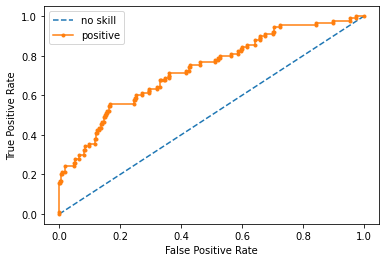

In [28]:
ns_probs = [0 for _ in range(len(y_test))]

# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Nothing: ROC AUC=%.3f' % (ns_auc))
print('positive: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='no skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label= 'positive')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()